In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [33]:
product = pd.read_csv('data_product_final.csv')
product.head()

,id_inventory,created_at,sold_at,costs,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,...,latitude,longitude,costs-2,category,name_produk,brand,retail_price,department,sku,distribution_center_id
0,53555,2021-03-05 00:52:04,2021-03-18 00:28:04,9.5545,Accessories,Husky Animal Hat with Mittens,NaN,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,...,29.7604,-95.3698,9.5545,Accessories,Husky Animal Hat with Mittens,NaN,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,3
1,53556,2021-11-18 08:12:00,NaN,9.5545,Accessories,Husky Animal Hat with Mittens,NaN,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,...,29.7604,-95.3698,9.5545,Accessories,Husky Animal Hat with Mittens,NaN,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,3
2,53557,2021-07-25 03:11:00,NaN,9.5545,Accessories,Husky Animal Hat with Mittens,NaN,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,...,29.7604,-95.3698,9.5545,Accessories,Husky Animal Hat with Mittens,NaN,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,3
3,185700,2021-11-27 21:22:03,2022-01-03 06:49:03,9.5545,Accessories,Husky Animal Hat with Mittens,NaN,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,...,29.7604,-95.3698,9.5545,Accessories,Husky Animal Hat with Mittens,NaN,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,3
4,185701,2021-08-22 18:08:00,NaN,9.5545,Accessories,Husky Animal Hat with Mittens,NaN,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,...,29.7604,-95.3698,9.5545,Accessories,Husky Animal Hat with Mittens,NaN,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,3


In [34]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487394 entries, 0 to 487393
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id_inventory             487394 non-null  int64  
 1   created_at               487394 non-null  object 
 2   sold_at                  180508 non-null  object 
 3   costs                    487394 non-null  float64
 4   product_category         487394 non-null  object 
 5   product_name             487359 non-null  object 
 6   product_brand            487020 non-null  object 
 7   product_retail_price     487394 non-null  float64
 8   product_department       487394 non-null  object 
 9   product_sku              487394 non-null  object 
 10  product_distribution_id  487394 non-null  int64  
 11  name_distribution        487394 non-null  object 
 12  latitude                 487394 non-null  float64
 13  longitude                487394 non-null  float64
 14  cost

In [35]:
product['sold_at']=pd.to_datetime(product['sold_at'], infer_datetime_format=True)
product['created_at']=pd.to_datetime(product['created_at'], infer_datetime_format=True)

In [36]:
product_copy = product[['sold_at', 'created_at']]

product_time=product_copy.reset_index()

for column in product_time:
    product[column+'_year'] = pd.DatetimeIndex(product_time[column]).year
    product[column+'_month'] = pd.DatetimeIndex(product_time[column]).month

In [37]:
product.head()

,id_inventory,created_at,sold_at,costs,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,...,retail_price,department,sku,distribution_center_id,index_year,index_month,sold_at_year,sold_at_month,created_at_year,created_at_month
0,53555,2021-03-05 00:52:04,2021-03-18 00:28:04,9.5545,Accessories,Husky Animal Hat with Mittens,NaN,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,...,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,3,1970,1,2021.0,3.0,2021,3
1,53556,2021-11-18 08:12:00,NaT,9.5545,Accessories,Husky Animal Hat with Mittens,NaN,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,...,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,3,1970,1,NaN,NaN,2021,11
2,53557,2021-07-25 03:11:00,NaT,9.5545,Accessories,Husky Animal Hat with Mittens,NaN,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,...,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,3,1970,1,NaN,NaN,2021,7
3,185700,2021-11-27 21:22:03,2022-01-03 06:49:03,9.5545,Accessories,Husky Animal Hat with Mittens,NaN,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,...,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,3,1970,1,2022.0,1.0,2021,11
4,185701,2021-08-22 18:08:00,NaT,9.5545,Accessories,Husky Animal Hat with Mittens,NaN,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,...,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,3,1970,1,NaN,NaN,2021,8


In [38]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487394 entries, 0 to 487393
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id_inventory             487394 non-null  int64         
 1   created_at               487394 non-null  datetime64[ns]
 2   sold_at                  180508 non-null  datetime64[ns]
 3   costs                    487394 non-null  float64       
 4   product_category         487394 non-null  object        
 5   product_name             487359 non-null  object        
 6   product_brand            487020 non-null  object        
 7   product_retail_price     487394 non-null  float64       
 8   product_department       487394 non-null  object        
 9   product_sku              487394 non-null  object        
 10  product_distribution_id  487394 non-null  int64         
 11  name_distribution        487394 non-null  object        
 12  latitude        

In [39]:
product.drop(['id_inventory', 'latitude', 'longitude', 'costs-2', 'brand', 'category', 'name_produk', 'sku','index_year', 'index_month', 'distribution_center_id'], axis = 1, inplace=True)

In [40]:
product['profit'] = product['retail_price']-product['costs']
product['purchase_range'] = abs(product['sold_at_month']-product['created_at_month'])

In [41]:
product.describe(include='all')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11484\1777822555.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  product.describe(include='all')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11484\1777822555.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  product.describe(include='all')


,created_at,sold_at,costs,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_id,name_distribution,retail_price,department,sold_at_year,sold_at_month,created_at_year,created_at_month,profit,purchase_range
count,487394,180508,487394.000000,487394,487359,487020,487394.000000,487394,487394,487394.000000,487394,487394.000000,487394,180508.000000,180508.000000,487394.000000,487394.000000,487394.000000,180508.000000
unique,444495,180172,NaN,26,27247,2754,NaN,2,29050,NaN,10,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-05-24 13:37:00,2022-03-10 07:49:24,NaN,Intimates,Wrangler Men's Premium Performance Cowboy Cut ...,Allegra K,NaN,Men,CD79499E36195AC3C3296EB666F9D39E,NaN,Memphis TN,NaN,Men,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,3,NaN,36319,147,16392,NaN,244421,55,NaN,65104,NaN,244421,NaN,NaN,NaN,NaN,NaN,NaN
first,2018-11-11 19:28:08,2019-01-05 05:39:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-06-06 17:12:33.005180,2022-06-06 18:17:03.965896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,28.746374,NaN,NaN,NaN,59.772834,NaN,NaN,4.992101,NaN,59.772834,NaN,2021.136077,5.926995,2020.866582,5.942318,31.026460,1.743474
std,NaN,NaN,30.629290,NaN,NaN,NaN,65.871768,NaN,NaN,2.895917,NaN,65.871768,NaN,0.851238,3.369965,0.790422,3.482263,36.229165,2.748080
min,NaN,NaN,0.008300,NaN,NaN,NaN,0.020000,NaN,NaN,1.000000,NaN,0.020000,NaN,2019.000000,1.000000,2018.000000,1.000000,0.011700,0.000000
25%,NaN,NaN,11.394300,NaN,NaN,NaN,24.780001,NaN,NaN,2.000000,NaN,24.780001,NaN,2021.000000,3.000000,2020.000000,3.000000,11.767640,0.000000


## insight yang harus didapat
-kategori produk yang paling banyak laku
-siapa saja/negara mana saja yang berpotensi membeli dalam jumlah banyak
-kapan rata-rata produk tersebut laku setelah dipampang
-dimana pusat distribusi yang mampu menyediakan produk dengan jumlah banyak
-mengapa ada produk yang lama terjual
-bagaimana estimasi biaya yang dibutuhkan perusahaan dalam setahun kedepan
-berapa keuntungan rata-rata per tahunnya
## yang perlu di drop
id_inventory, latitude, longitude, costs_2, brand, category, name_produk

In [42]:
product_category = product[['product_category', 'product_brand']]

for column in product_category:
    product[column].fillna(product[column].mode(), inplace=True)

<AxesSubplot:>

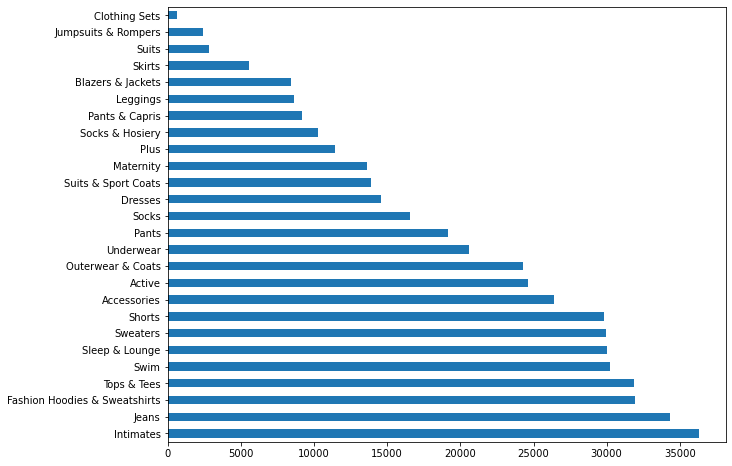

In [43]:
product_category = product['product_category'].value_counts()
product_category.plot(kind='barh',figsize=(10,8))

**Insight:** Category intimates is the most supplied product categories

<AxesSubplot:>

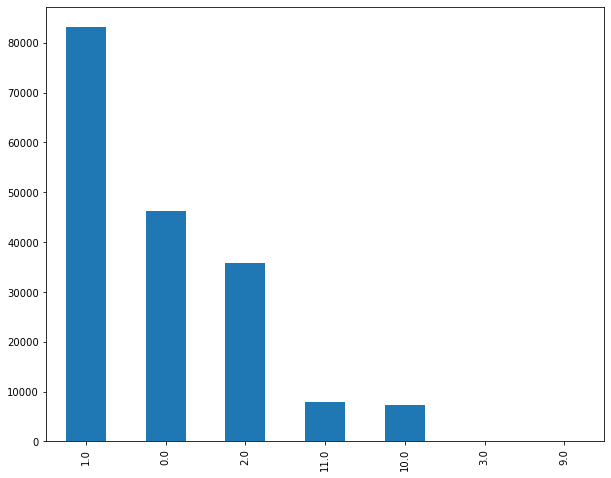

In [44]:
purchase = product['purchase_range'].value_counts()
purchase.plot(kind='bar',figsize=(10,8))

**Insight:** Many products sell out just for one month

<AxesSubplot:>

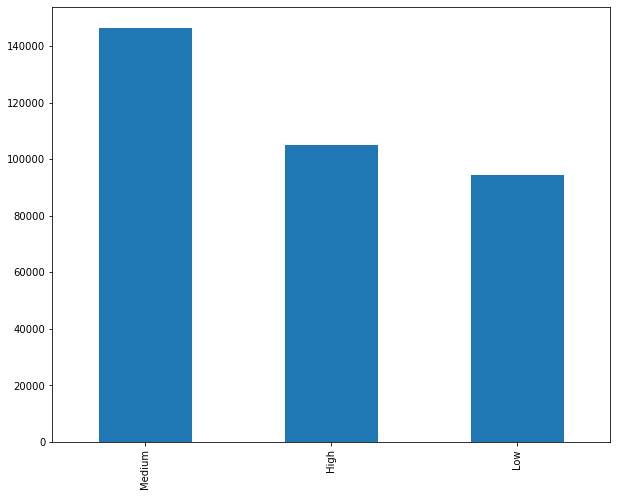

In [45]:
category=['Low','Medium', 'High']
product['profit_rate']=pd.cut(product['profit'], [0,10,20,32], labels=category)
profit_rate = product['profit_rate'].value_counts()
profit_rate.plot(kind='bar',figsize=(10,8))

**Insight:** many product having a medium profit in range 10000-20000

<AxesSubplot:>

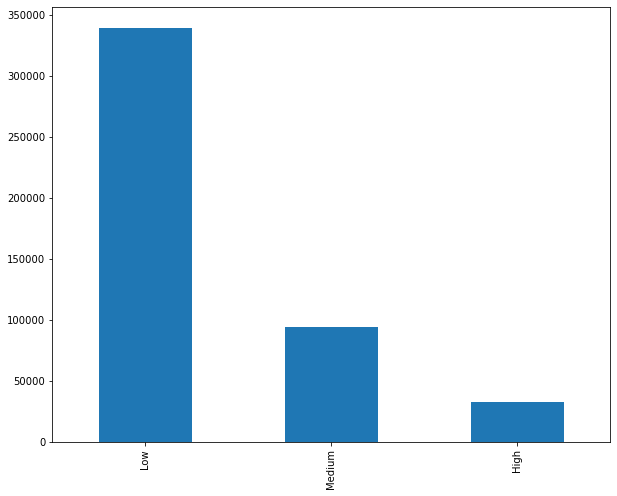

In [46]:
product_retail_range = product.copy()

non_customer_target = product_retail_range[product_retail_range['sold_at_month']==0].index
product_retail_range.drop(non_customer_target,inplace=True)

category=['Low','Medium', 'High']
product_retail_range['product_retail_price']=pd.cut(product_retail_range['retail_price'], [0,60,120,180], labels=category)
retailprice_rate = product_retail_range['product_retail_price'].value_counts()
retailprice_rate.plot(kind='bar',figsize=(10,8))

**Insight:** Customer are interested in product with range 120-60.000

<AxesSubplot:>

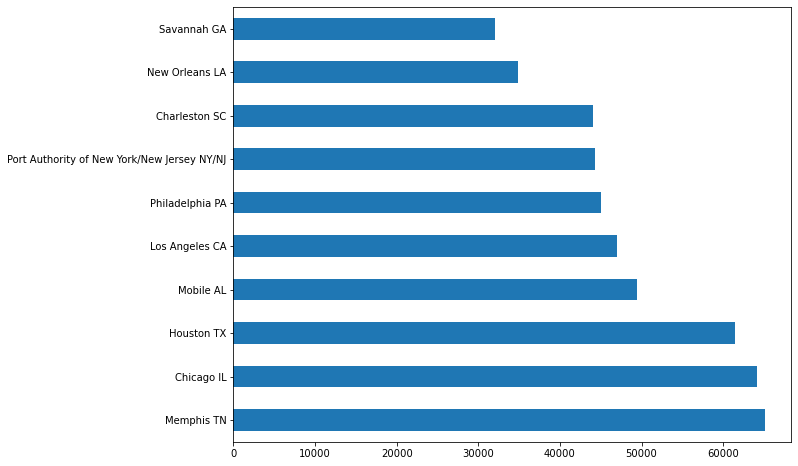

In [47]:
distribution = product['name_distribution'].value_counts()
distribution.plot(kind='barh',figsize=(10,8))

In [52]:
ts = product[['created_at','profit']]
ts.info()
ts1=ts.copy()
ts1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487394 entries, 0 to 487393
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   created_at  487394 non-null  datetime64[ns]
 1   profit      487394 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487394 entries, 0 to 487393
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   created_at  487394 non-null  datetime64[ns]
 1   profit      487394 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.4 MB


created_at
2018-11-11 19:28:08.000000    35.177999
2018-11-16 17:49:21.000000    28.857779
2018-11-28 12:35:13.000000    12.240000
2018-12-01 08:34:59.000000    38.293000
2018-12-04 07:19:29.000000     3.459670
                                ...    
2022-06-04 22:28:13.578318    24.295141
2022-06-05 02:27:18.173060     6.852300
2022-06-05 02:44:54.000000    75.270000
2022-06-05 08:40:16.463583     9.371760
2022-06-06 17:12:33.005180     5.988390
Name: profit, Length: 444495, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444495 entries, 0 to 444494
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   created_at  444495 non-null  datetime64[ns]
 1   profit      444495 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.8 MB


,created_at,profit
0,2018-11-11 19:28:08,35.177999
1,2018-11-16 17:49:21,28.857779
2,2018-11-28 12:35:13,12.240000
3,2018-12-01 08:34:59,38.293000
4,2018-12-04 07:19:29,3.459670


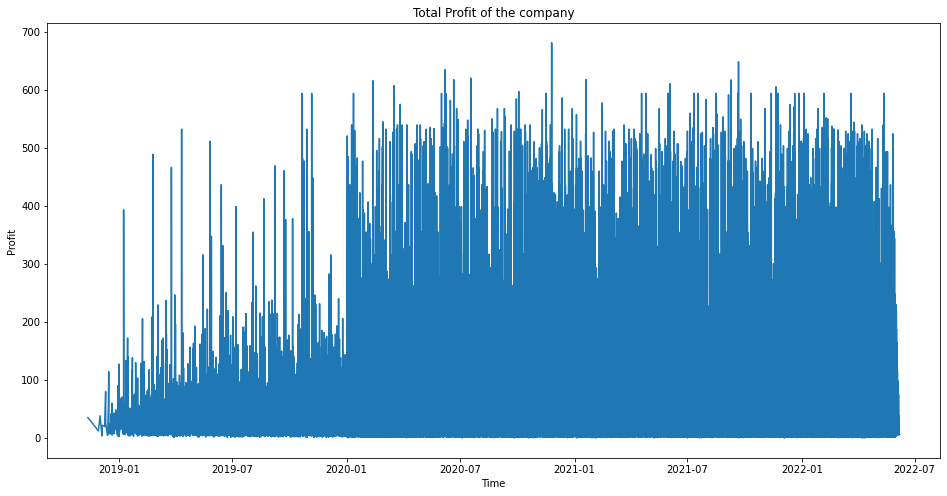

In [81]:
ts2=product.groupby(["created_at"])["profit"].sum()
plt.figure(figsize=(16,8))
plt.title('Total Profit of the company')
plt.xlabel('Time')

plt.ylabel('Profit')
plt.plot(ts2)
print(ts2)
ts2.head()
ts2 = ts2.reset_index()
ts2.info()
ts2.head()

In [83]:
def created_fitures(ts):
    ts['year'] = ts.index.year
    ts['month'] = ts.index.month
    ts['date'] = ts.index.date
    return ts

In [87]:
ts2 = ts2.set_index('created_at')
ts2.index = pd.to_datetime(ts2.index)

<AxesSubplot:xlabel='created_at'>

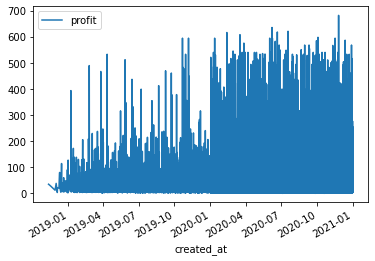

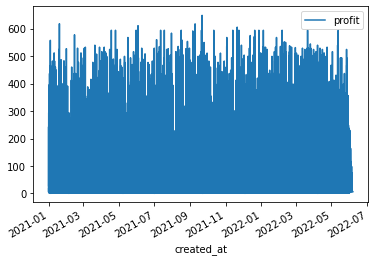

In [108]:
train = ts2.loc[ts2.index < '2021-01-01']
test = ts2.loc[ts2.index >= '2021-01-01']

train.plot()
test.plot()

In [111]:
train['year'] = train.index.year
train['month'] = train.index.month
train['hour'] = train.index.hour
train['minute'] = train.index.minute
train['second'] = train.index.second

test['year'] = test.index.year
test['month'] = test.index.month
test['hour'] = test.index.hour
test['minute'] = test.index.minute
test['second'] = test.index.second
train.info()
test.info()
features = ['year', 'month', 'hour', 'minute', 'second']
target = 'profit'

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11484\2556579264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['year'] = train.index.year
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11484\2556579264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] = train.index.month
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11484\2556579264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 152008 entries, 2018-11-11 19:28:08 to 2020-12-31 23:50:09
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   profit  152008 non-null  float64
 1   year    152008 non-null  int64  
 2   month   152008 non-null  int64  
 3   hour    152008 non-null  int64  
 4   minute  152008 non-null  int64  
 5   second  152008 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 8.1 MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292487 entries, 2021-01-01 00:03:22 to 2022-06-06 17:12:33.005180
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   profit  292487 non-null  float64
 1   year    292487 non-null  int64  
 2   month   292487 non-null  int64  
 3   hour    292487 non-null  int64  
 4   minute  292487 non-null  int64  
 5   second  292487 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 15.6

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11484\2556579264.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['second'] = test.index.second


In [112]:
x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

In [100]:
!pip install xgboost

In [119]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

reg = xgb.XGBRegressor(n_estimators=10000, early_stopping_rounds=50)
reg.fit(x_train, y_train, eval_set=[(x_train,y_train), (x_test, y_test)], verbose=True)

[0]	validation_0-rmse:46.38704	validation_1-rmse:45.36504
[1]	validation_0-rmse:43.12358	validation_1-rmse:42.20327
[2]	validation_0-rmse:41.42470	validation_1-rmse:40.56499
[3]	validation_0-rmse:40.55989	validation_1-rmse:39.73107
[4]	validation_0-rmse:40.12268	validation_1-rmse:39.32224
[5]	validation_0-rmse:39.89790	validation_1-rmse:39.12120
[6]	validation_0-rmse:39.78414	validation_1-rmse:39.02076
[7]	validation_0-rmse:39.71607	validation_1-rmse:38.97640
[8]	validation_0-rmse:39.68100	validation_1-rmse:38.95476
[9]	validation_0-rmse:39.65226	validation_1-rmse:38.94617
[10]	validation_0-rmse:39.63232	validation_1-rmse:38.94417
[11]	validation_0-rmse:39.61754	validation_1-rmse:38.94337
[12]	validation_0-rmse:39.60038	validation_1-rmse:38.94565
[13]	validation_0-rmse:39.58849	validation_1-rmse:38.94922
[14]	validation_0-rmse:39.57590	validation_1-rmse:38.95348
[15]	validation_0-rmse:39.56494	validation_1-rmse:38.96472
[16]	validation_0-rmse:39.55382	validation_1-rmse:38.96889
[17]	va

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [118]:
import numpy as np
test['prediction'] = reg.predict(x_test)
ts2 = ts2.merge(test[['prediction']], how='left', left_index=True, right_index=True)
score = np.sqrt(mean_squared_error(test['profit'], test['prediction']))
print('Mean_squared_error:',score)

Mean_squared_error: 38.943371810777855


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11484\1616481147.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'prediction_x'} in the result is deprecated and will raise a MergeError in a future version.
  ts2 = ts2.merge(test[['prediction']], how='left', left_index=True, right_index=True)
